<a href="https://colab.research.google.com/github/KevinAkat/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
import numpy as np
import pandas as pd

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-04-11 00:06:21--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.133.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.133.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.9MB/s    in 13s     

2020-04-11 00:06:35 (15.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
# Well, first let's concatenate order_products__prior and __train
# since we're trying to find the counts for all orders

total_order_products = pd.concat([order_products__prior, order_products__train])

print(order_products__prior.shape)
print(order_products__train.shape)
total_order_products.shape

# Okay, looks like they're combined now.



(32434489, 4)
(1384617, 4)


(33819106, 4)

In [0]:
# Looking at the table

total_order_products.head()



,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Let's look at the products table

products.head()


# I think we need to do an inner merge on Product ID

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# Merging Total_Order table with the Products table on an inner join and on product ID

products_merged = pd.merge(total_order_products, products, how="inner", on="product_id")

In [0]:
# Checking the head

products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [0]:
# Identifying the top 10

products_merged['product_name'].value_counts()[:11]

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Organic Raspberries       142603
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

NameError: ignored

#Replicating the Lesson Code#

In [0]:
df1 = pd.DataFrame({'a': [1,2,3,4], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df2 = pd.DataFrame({'a': [6,4,8,7], 'b': [9,4,3,2], 'c': [1,6,2,9]})

In [0]:
# Checking the head for df1

df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [0]:
# Checking the head for df2

df2.head()

,a,b,c
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
# Concatenate by rows

by_rows = pd.concat([df1,df2])

by_rows

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
# Concatenate by column

by_col = pd.concat([df1,df2], axis=1)

by_col

,a,b,c,a,b,c
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [0]:
df3 = pd.DataFrame({'a': [4,3,2,1], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df4 = pd.DataFrame({'a': [6,4,8,7,8], 'b': [9,4,3,2,1], 'd': [1,6,2,9,5]})

In [0]:
# Checking the df3 dataframe

df3.head()

,a,b,c
0,4,4,7
1,3,5,8
2,2,6,9
3,1,7,10


In [0]:
# Checking the df4 dataframe

df4.head()

,a,b,d
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9
4,8,1,5


In [0]:
# This is what happens when you try to concatenate by row
# but the column headers don't match

by_rows_two = pd.concat([df3,df4])

by_rows_two

# NaN City

,a,b,c,d
0,4,4,7.0,NaN
1,3,5,8.0,NaN
2,2,6,9.0,NaN
3,1,7,10.0,NaN
0,6,9,NaN,1.0
1,4,4,NaN,6.0
2,8,3,NaN,2.0
3,7,2,NaN,9.0
4,8,1,NaN,5.0


In [0]:
# Seeing this same phenomenon when concatenating by columns

by_cols_two = pd.concat([df3,df4], axis=1)

by_cols_two

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


In [0]:
# Subsetting

by_cols_two['a']

,a,a
0,4.0,6
1,3.0,4
2,2.0,8
3,1.0,7
4,NaN,8


In [0]:
# Importing the Instacart image

from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
# Using !wget Bash command to grab the zipped file

!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-04-09 19:51:10--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.8.173
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.8.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.3MB/s    in 13s     

2020-04-09 19:51:24 (14.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
# Using the !tar Bash command to unzip the files

!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
# Changing the directory, but IDK why I'm doing this

%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
# Inspecting the aisle.cv file

aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# Inspecting the departments.cv file

departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
# Inspecting the Order_Products__Prior File and creating the Dataframe for this file

order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Inspecting the Order_Products__Train File and creating the Dataframe for this file

order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
# Inspecting the Orders file and creating the Dataframe for this file

orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# Inspecting the Products file and creating the Dataframe for this file

products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# Looking at the example

display(example)

In [0]:
# Creating order_products dataframe to stack the order_products__prior and __train
# Datasets on top of one another, but you can also choose specific 
# columns you want from each dataset. 

order_products = pd.concat([order_products__prior[['order_id', 'product_id', 'add_to_cart_order']],
                            order_products__train[['order_id', 'product_id', 'add_to_cart_order']]])

print(order_products.shape)
order_products.head(10)

# So, the inner-most brackets is a list
# The second inner-most brackets says is the subsetting part
# The outer-most bracket puts the two dataframe into a list of 2 elements

(33819106, 3)


,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
5,2,17794,6
6,2,40141,7
7,2,1819,8
8,2,43668,9
9,3,33754,1


In [0]:
# Both datasets are BIG

print(order_products__prior.shape)
order_products__train.shape

(32434489, 4)


(1384617, 4)

In [0]:
# We're bringing up the example again. 

display(example)

In [0]:
loan_status = "Not Current"

if loan_status == "Current" or loan_status == "Fully Paid":
  print ("It's Current!")

In [0]:
loan_status == "Current"

False

In [0]:
# Dataframe Filtering

# First, we create a condition:



# This says, grab that condition out of the orders DF, hence
# the orders[orders[ bit

orders[orders['order_id'] <=5]

# We can also do it like this:

order_LT_5_condition = orders['order_id'] <=5

subset_example = orders[order_LT_5_condition]

subset_example

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [0]:
# So, for our table, we can create condiitons for what we want the new table to look like

condition1 = orders['user_id'] == 1
condition2 = orders['order_number'] <= 2

orders_subset = orders[(condition1 & condition2)]

orders_subset

# This is taking a subset of a smaller dataframe using two conditions
# We use a paranthesis and amperand for some reason, but I won't stress on why

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
order_products_subset = order_products[(order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)]

order_products_subset

# The | is the or version of & and why we can't use and/or

,order_id,product_id,add_to_cart_order
22742744,2398795,196,1
22742745,2398795,10258,2
22742746,2398795,12427,3
22742747,2398795,13176,4
22742748,2398795,26088,5
22742749,2398795,13032,6
24076664,2539329,196,1
24076665,2539329,14084,2
24076666,2539329,12427,3
24076667,2539329,26088,4


In [0]:
orders_and_products = pd.merge(orders_subset, order_products_subset, how='inner', on='order_id')

orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order
0,2539329,1,prior,1,2,8,NaN,196,1
1,2539329,1,prior,1,2,8,NaN,14084,2
2,2539329,1,prior,1,2,8,NaN,12427,3
3,2539329,1,prior,1,2,8,NaN,26088,4
4,2539329,1,prior,1,2,8,NaN,26405,5
5,2398795,1,prior,2,3,7,15.0,196,1
6,2398795,1,prior,2,3,7,15.0,10258,2
7,2398795,1,prior,2,3,7,15.0,12427,3
8,2398795,1,prior,2,3,7,15.0,13176,4
9,2398795,1,prior,2,3,7,15.0,26088,5


In [0]:
# Looking at the example again

display(example)

In [0]:
# Remove columns we don't need

# We do this by updating the current variable "orders and products"
# with an updated list of column names we want, thereby
# taking out all the columns we don't one. 
# It's not removing columns, so muc as it is
# creating a new dataframe with only the taret
# columns we want

orders_and_products = orders_and_products[['user_id', 'order_id', 
                                           'order_number', 'order_dow', 
                                           'order_hour_of_day', 
                                           'add_to_cart_order', 'product_id']]

orders_and_products


,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [0]:
# This is creating a subset of product_ids based on whether it's on the order_and_products table

condition_product_id = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition_product_id]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [0]:
final_table = pd.merge(orders_and_products, products_subset[['product_id','product_name']], 
                       how='inner', on='product_id')

final_table

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [0]:
# sorting rows

final_table = final_table.sort_values(by=['order_number','add_to_cart_order'])

final_table

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
# Comparing with example

display(example)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Looking at table1

table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
# Transposing (T) the above table 

table2 = table1.T
table2

,0,1,2
index,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16,3
treatmentb,2,11,1


In [0]:
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
# We'll neet to reset the index b/c we want to be able to have a row available
# for each individual "observation"

table1 = table1.reset_index()

table1

,level_0,index,treatmenta,treatmentb
0,0,John Smith,NaN,2
1,1,Jane Doe,16.0,11
2,2,Mary Johnson,3.0,1


In [0]:
# Melt turns Wide format into Tidy format.
# id_vars is the unique identifier column
# John Smith has multiple treatments.
# John Smith on treatment a and treatment b
# can each be seperated out into seperate observational records.
# This would be akin to the same studnet with 3 exam scores, you 
# can seperate those 3 exam scores out, per studnet, into their
# own unqiue rows. Wide format makes a matrix out of the unique identifier
# (the student) and their respective observations. The multiple observation
# attached to a single unique identifier get put into colummns when 
# put into tidy data format (melt). 

tidy_table_1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy_table_1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# remanming the columns
# rememeber df.rename(columns={})

tidy_table_1 = tidy_table_1.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy_table_1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy_table_1['trt'] = tidy_table_1.trt.str.replace('treatment','')

tidy_table_1

# Ryan has tidy1.trt = tidy1.trt.str.replace('treatment', ''), which appears
# to be the same thinga s what I have.

# Takeaway here is that you can .str.replace to not only replace characters
# but to remove characters by selecting the part you don't want and replacing
# it with an empty string

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
# df.pivot_table turns Tidy format into wide format
# index is the unique identifier
# The thing that segmented multiple data points attached to the 
# same unique identifier (trt) now beocomes a column in Wide format
# Values becomes the only regular, non row/column "cells"
# John Smith (UI) has multiple treatments.
# John Smith on treatment a and treatment b
# can each be seperated out into seperate columns.
# This would be akin to the same studnet with 3 exam scores, you 
# can seperate those 3 exam scores out, per student, or you can create
# A cross-tabbish looking table with  into their
# own unqiue rows. Wide format makes a matrix out of the unique identifier
# (the student) and their respective observations. The multiple observation
# attached to a single unique identifier get put into colummns when 
# put into tidy data format (melt). 

wide_format = tidy_table_1.pivot_table(index='name',columns='trt',values='result')

wide_format

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy



,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


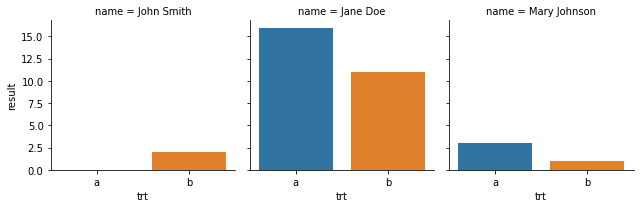

In [0]:
import seaborn as sns

sns.catplot(x='trt',y='result',col='name',
            kind='bar',data=tidy_table_1, height=3);

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
# Reading in the dataframes again

products_df = pd.read_csv('products.csv')
order_products__prior_df = pd.read_csv('order_products__prior.csv')
order_products__train_df = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')


In [0]:
# Concatenating order_products__prior and order_products__train

concat_orders_df = pd.concat([order_products__prior_df, order_products__train_df])

print(concat_orders_df.shape)

concat_orders_df.head()

concat_orders_df.tail()


(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [0]:
# per the chart cabove, we're targeting the "Half Baked Frozen Yogurt"
# and Half and Half Ultra Pasteurized 

# Creating a list for the two target products

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
# This gives us a list of columns in a dataframe

products_df.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [0]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
concat_orders_df.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
# So the goal here is to merge the products and orders datasets, but
# they don't have any unique IDs in common, so we can use a 3rd dataframe
# with IDs from both tables to merge all 3

merged_all_three = (products_df[['product_id', 'product_name']]
                  .merge(concat_orders_df[['order_id','product_id']])
                  .merge(orders[['order_id','order_hour_of_day']]))

In [0]:
merged_all_three.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
# tidy -> table2

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####